<a href="https://colab.research.google.com/github/geovane186/MVP_Estimate_Obesity_Levels/blob/main/MVP_MachineLearning_GeovaneSantos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning & Analytics - Aluno: Geovane Santos
# Problema de Classificação - Estimar os Níveis de Obesidade com Base nos Hábitos Alimentares e na Condição Física




## Definição do Problema

### **Descrição**
O problema em questão é um problema de classificação que utiliza um dataset com informações sobre hábitos alimentares e condições físicas de indivíduos do México, Peru e Colômbia. O objetivo é treinar um modelo de machine learning para prever o nível de obesidade desses indivíduos. A variável de classe a ser prevista é NObesity (Nível de Obesidade). Com base em uma análise inicial dos dados, levanta-se a hipótese de que indivíduos com hábitos alimentares inadequados e condições físicas debilitadas apresentam maior probabilidade de ter níveis mais elevados de obesidade.

Na seleção dos dados, foram impostas algumas restrições para garantir a relevância e a qualidade do dataset, sendo essas restrições a escolha de um problema de classificação e a aplicação na área de saúde e medicina.

O dataset contém 17 atributos e 2111 registros. Antes de carregá-lo, selecionei aleatoriamente 5 registros para serem inseridos como simulação, com o objetivo de testar a acurácia do modelo em dados novos. Dessa forma, o conjunto de dados é composto por dois arquivos: um com 2106 registros e outro com 5 registros para simulação. Os registros estão rotulados com a variável de classe NObesity (Nível de Obesidade), o que permite classificar os indivíduos nos seguintes níveis: Peso Insuficiente, Peso Normal, Sobrepeso Nível I, Sobrepeso Nível II, Obesidade Tipo I, Obesidade Tipo II e Obesidade Tipo III. Além disso, 77% dos dados foram gerados sinteticamente usando a ferramenta Weka e o filtro SMOTE, enquanto os outros 23% foram coletados diretamente de usuários por meio de uma plataforma web.
### **Atributos**
 - Gender - Categórico - Male/Female - Genero do indivíduo.
 - Age - Contínuo - Idade do indivíduo.
 - Height - Contínuo - Altura do indivíduo.
 - Weight - Contínuo - Peso do indivíduo.
 - family_history_with_overweight - Binário - Algum membro da família do indivíduo já sofreu ou sofre de sobrepeso?
 - FAVC - Binário - O indivíduo consome alimentos altamente calóricos com frequência?
 - FCVC - Inteiro - O indivíduo costuma comer vegetais nas suas refeições?
 - NCP - Contínuo - Quantas refeições principais o indivíduo faz diariamente?
 - CAEC - Categórico - no/Sometimes/Frequently/Always - O indivíduo consome algum alimento entre as refeições?
 - SMOKE - Binário - O indivíduo fuma?
 - CH2O - Contínuo - Quanto de água o indivíduo bebe diariamente?
 - SCC - Binário - O indivíduo monitora as calorias que consome diariamente?
 - FAF	- Contínuo - Com que frequência o indivíduo pratica atividade física?
 - TUE	- Inteiro - Quanto tempo o indivíduo utiliza dispositivos tecnológicos, como celular, videogames, televisão, computador e outros?
 - CALC - Categórico - no/Sometimes/Frequently/Always - Com que frequência o indivíduo consome álcool?
 - MTRANS - Categórico - Public_Transportation,Walking,Automobile,Motorbike,Bike - Qual meio de transporte o indivíduo costuma usar?
 - NObeyesdad - Categórico - Insufficient_Weight/Normal_Weight/Overweight_Level_I/Overweight_Level_II/Obesity_Type_I/Obesity_Type_II/Obesity_Type_III - Nível de obesidade do indivíduo

> [**OBSERVAÇÃO**]

> **Existem trechos do código com a execução lenta**

## Importação de Bibliotecas

In [ ]:
# 1) Import de bibliotecas

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports de bibliotecas de manipulação de dados
import pandas as pd  # Manipulação de dados em tabelas
import numpy as np   # Funções matemáticas e arrays

# Imports para visualização
import matplotlib.pyplot as plt  # Criação de gráficos e visualizações

# Pré-processamento e transformação de dados
from sklearn.compose import ColumnTransformer  # Composição de pré-processamento para pipelines
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, FunctionTransformer  # Escalonamento e transformação de variáveis
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel  # Seleção de atributos

# Divisão e validação do modelo
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV  # Particionamento dos dados e validação cruzada

# Métricas e avaliação
from sklearn.metrics import accuracy_score  # Avaliação de desempenho do modelo

# Utilização de pipelines
from sklearn.pipeline import Pipeline  # Facilitando a organização do processo de aprendizado de máquina

# Modelos de classificação
from sklearn.linear_model import LogisticRegression  # Regressão logística
from sklearn.tree import DecisionTreeClassifier  # Árvore de decisão
from sklearn.neighbors import KNeighborsClassifier  # KNN
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.svm import SVC  # Máquina de vetor de suporte (SVM)
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier  # Modelos ensemble

## Carga e inspeção do dataset

In [ ]:
# 2) Carga do DataSet por url

# url a importar
url_dados = 'https://raw.githubusercontent.com/geovane186/MVP_Estimate_Obesity_Levels/refs/heads/main/DataSet/ObesityDataSet_raw_and_data_sinthetic_training.csv'

# Carga do dataset através do csv
obesityDataSet = pd.read_csv(url_dados)

# Verifica o tipo de obesityDataSet
print('Classe do DataSet:',type(obesityDataSet), '\n')

# Exibe as 5 primeiras linhas
print(obesityDataSet.head(), '\n')

# Verificando se existem valores ausentes
print('Check de valores ausentes:\n',obesityDataSet.isnull().sum())

# Verificando os tipos das colunas
print('\n Tipos das colunas:\n',obesityDataSet.dtypes)

Classe do DataSet: <class 'pandas.core.frame.DataFrame'> 

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportat

## Preparação de Dados

### Divisão inicial do dataset (Holdout e Validação Cruzada)


Utilizando o conceito de holdout, o dataset foi dividido em 80% para treinamento e 20% para teste.

Além disso, foi aplicada a validação cruzada com 10 partições para uma avaliação mais robusta do modelo. Esse método reduz a dependência da aleatoriedade de uma única divisão treino/teste, proporcionando uma estimativa mais confiável do desempenho do modelo. Ao validar o modelo em diferentes partes do conjunto de dados, a validação cruzada também ajuda a detectar overfitting, ou seja, a identificar se o modelo está se ajustando excessivamente aos dados de treinamento, o que poderia comprometer sua capacidade de generalização para novos dados.



In [ ]:
# 3) Divisão inicial do dataset (Holdout e Validação Cruzada)

seed = 42 # Semente para reprodutibilidade

testSize = 0.20 # tamanho do conjunto de teste

# Separação em conjuntos de treino e teste
X = obesityDataSet.drop(columns=['NObeyesdad'])
y = obesityDataSet['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=testSize, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

###Transformação de dados e pré-processamento inicial

Utilizamos o conceito de pipeline para o treinamento do modelo, e na etapa de pré-processamento, foi necessário codificar as variáveis categóricas para numéricas, uma vez que alguns classificadores não funcionam com variáveis categóricas no formato de string. Para essa codificação, utilizamos o ColumnTransformer, uma ferramenta do Python para transformação de dados.

In [ ]:
# 4) Codificação de atributos

np.random.seed(42)

# Codificação personalizada (usando funções auxiliares)
def encode_ordinal(data, columns, mapping_dicts):
    for col, mapping in zip(columns, mapping_dicts):
        data[col] = data[col].map(mapping)
    return data

# Mapeamento explícito para variáveis categóricas
ordinal_mappings = [
    {'Female': 0, 'Male': 1}, # Gender
    {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},  # CAEC
    {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}  # CALC
]

# Definir colunas categóricas
ordinal_cols = ['Gender', 'CAEC', 'CALC']
nominal_cols = ['MTRANS']
categorical_simple_cols = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

# Criar transformações
ordinal_transformer = FunctionTransformer(
    encode_ordinal, kw_args={'columns': ordinal_cols, 'mapping_dicts': ordinal_mappings}
)
nominal_transformer = OneHotEncoder(handle_unknown='ignore')
# Para as variáveis categóricas simples (LabelEncoder em cada coluna)
simple_transformer = FunctionTransformer(lambda df: df.apply(lambda col: LabelEncoder().fit_transform(col)))

preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_transformer, ordinal_cols),
        ('nominal', nominal_transformer, nominal_cols),
        ('simple', simple_transformer, categorical_simple_cols)
    ],
    remainder='passthrough'  # Manter outras colunas inalteradas
)

# Codificação da variável target
target_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

# Codificar a variável target
y_train = y_train.map(target_mapping)
y_test = y_test.map(target_mapping)


Além disso, fazendo uso adequado do conceito de pipeline, treinamos os classificadores com nossa base de dados original, bem como com versões padronizadas e normalizadas. Para a padronização, utilizamos o **StandardScaler**(), e para a normalização, o **MinMaxScaler**().

In [ ]:
# Definindo outros pré-processadores
scalers = [
    ('StandardScaler', StandardScaler()), # Padronizador
    ('MinMaxScaler', MinMaxScaler()) # Normalizador
]

Fizemos o treinamento do modelo avaliando 3 técnicas de feature selection(Seleção de atributos):
 - **SelectKBest** - Uma técnica que tem como objetivo selecionar as K melhores características com base em uma métrica de avaliação, como a correlação com a variável de saída (classe).
 - **LogisticRegression** - Em um modelo de regressão logística, cada coeficiente associado a uma variável (característica) reflete a importância dessa variável para a previsão da variável dependente (classe).
 - **SelectFromModel com ExtraTreesClassifier** - É uma técnica que permite escolher variáveis com base na importância das mesmas, calculada por um modelo de aprendizado supervisionado. Quando utilizado com o ExtraTreesClassifier, o SelectFromModel seleciona as características mais relevantes com base na importância calculada pelas árvores de decisão dentro do modelo ExtraTreesClassifier.





In [ ]:
# Técnicas de seleção de atributos
selection_methods = [
    ('select_kbest', SelectKBest(score_func=f_classif, k=10)),
    ('rfe', RFE(LogisticRegression(max_iter=200), n_features_to_select=10)),
    ('selectET', SelectFromModel(ExtraTreesClassifier(n_estimators=100), threshold='mean'))
]

##Treinamento Do Modelo

Alguns algoritmos foram selecionados e inicialmente não foi feito nenhum ajuste nos hiperparametros. Os seguintes algoritmos classificadores para a resolução do problema foram:
 - **LogisticRegression** - Indicado para problemas de classificação binária ou multi-classe com relação linear entre as variáveis independentes e a classe Embora seja simples e eficiente, a regressão logística pode não capturar bem relações não lineares ou interações complexas entre as variáveis. No entanto, foi útil para uma linha de base inicial.
 - **DecisionTreeClassifier** - Por ser um modelo interpretável e rápido, apesar de ser mais sensível ao overfitting. Com o uso do pipeline tentamos evitar ao maximo que ocorra.

Também utilizamos modelos ensemble:
 - **RandomForestClassifier** - Foi uma escolha sólida devido à sua robustez, habilidade de lidar com dados complexos e capacidade de lidar bem com variáveis categóricas.
 - **ExtraTreesClassifier** - Com caracteristicas similares ao Random Forest, mas com um método de construção mais aleatório, de forma que pode ter um desempenho ainda melhor para o nosso cenário.
 - **GradientBoostingClassifier** - Por ser um poderoso classificador para capturar relações complexas e por sua caracteristica de se ajustar a dados desafiadores.
 - **AdaBoostClassifier**, **BaggingClassifier** e **VotingClassifier** - Esses modelos ensemble foram utilizados com para melhorar a performance com combinação de alguns classificadores.

Conforme analisamos os resultados, o modelo foi devidamente treinado e não observamos ocorrencia de underfitting.

O **GradientBoostingClassifier** apresentou o melhor desempenho, com uma acurácia média de 96%, tanto utilizando o pipeline com o dataset original quanto com o dataset padronizado, aplicando a técnica de Feature Selection (**SelectFromModel com ExtraTreesClassifier**). A seguir, avançaremos para a próxima seção com o objetivo de obter um resultado ainda melhor, focando na otimização dos hiperparâmetros.

> [**OBSERVAÇÃO**]

> **Este é um trecho do código lento**


LR: 0.704 (0.029)
CART: 0.933 (0.022)
RF: 0.954 (0.013)
ET: 0.928 (0.022)
GB: 0.963 (0.017)
Ada: 0.342 (0.050)
Bag: 0.950 (0.018)
Voting: 0.956 (0.015)
LR-select_kbest: 0.707 (0.032)
LR-rfe: 0.542 (0.031)
LR-selectET: 0.634 (0.026)
CART-select_kbest: 0.930 (0.025)
CART-rfe: 0.697 (0.025)
CART-selectET: 0.941 (0.019)
RF-select_kbest: 0.947 (0.013)
RF-rfe: 0.726 (0.032)
RF-selectET: 0.948 (0.016)
ET-select_kbest: 0.935 (0.017)
ET-rfe: 0.716 (0.027)
ET-selectET: 0.955 (0.025)
GB-select_kbest: 0.962 (0.018)
GB-rfe: 0.700 (0.024)
GB-selectET: 0.967 (0.021)
Ada-select_kbest: 0.342 (0.050)
Ada-rfe: 0.342 (0.031)
Ada-selectET: 0.343 (0.047)
Bag-select_kbest: 0.952 (0.021)
Bag-rfe: 0.700 (0.023)
Bag-selectET: 0.958 (0.018)
Voting-select_kbest: 0.951 (0.014)
Voting-rfe: 0.721 (0.023)
Voting-selectET: 0.955 (0.018)
LR-StandardScaler: 0.878 (0.021)
LR-MinMaxScaler: 0.732 (0.027)
CART-StandardScaler: 0.932 (0.021)
CART-MinMaxScaler: 0.935 (0.025)
RF-StandardScaler: 0.951 (0.019)
RF-MinMaxScaler: 0.

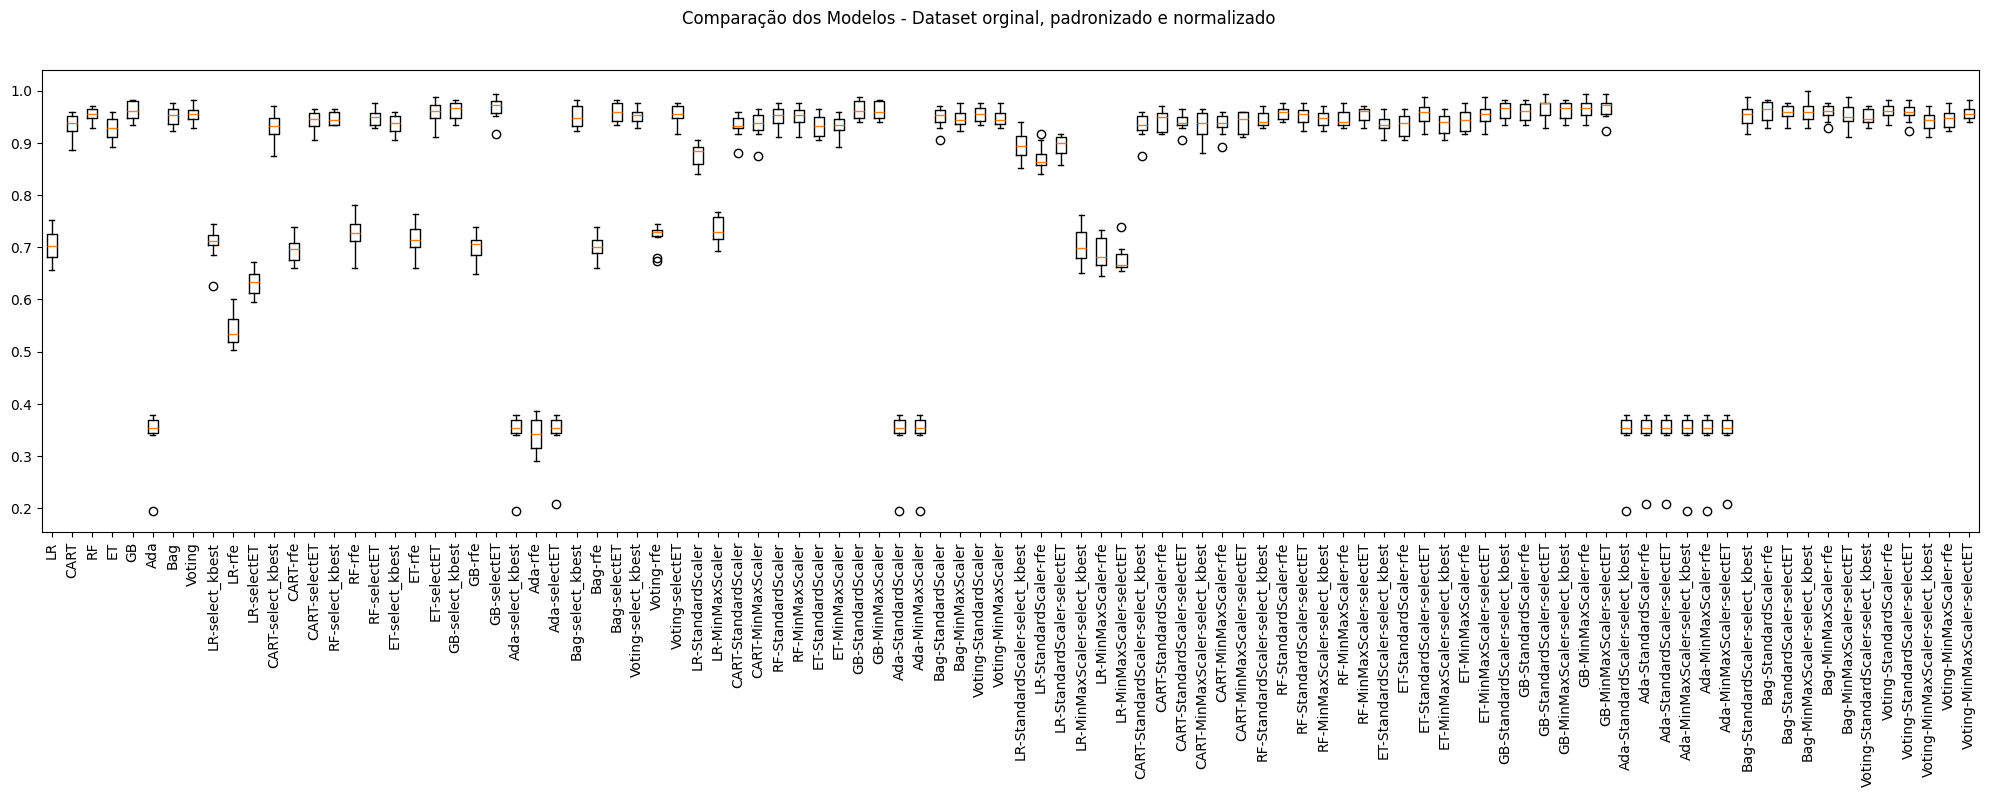

In [ ]:
# 5) Execução de Modelos para Análise
np.random.seed(42) # Definindo uma semente global

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Definindo o classificador base para o BaggingClassifier
base = DecisionTreeClassifier()

# Criando os modelos para o VotingClassifier
bases = []
bases.append(('RF', RandomForestClassifier()))
bases.append(('SVM', SVC()))
bases.append(('GB', GradientBoostingClassifier()))

# Criando os elementos do pipeline
models = [
    ('LR', LogisticRegression(max_iter=200)),
    ('CART', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('ET', ExtraTreesClassifier()),
    ('GB', GradientBoostingClassifier()),
    ('Ada', AdaBoostClassifier()),
    ('Bag', BaggingClassifier(estimator=base)),
    ('Voting', VotingClassifier(bases))
]

# Criando pipelines dinamicamente
# Dataset original
for model_name, model in models:
    pipelines.append((
        f'{model_name}',
        Pipeline(steps=[('preprocessing', preprocessor),
                        (model_name, model)])
        ))

# Dataset original com Feature Selection
for model_name, model in models:
    for selection_name, selection in selection_methods:
        pipelines.append((
            f'{model_name}-{selection_name}',
            Pipeline(steps=[('preprocessing', preprocessor),
                            (selection_name, selection),
                            (model_name, model)])
        ))

# Dataset padronizado e normalizado
for model_name, model in models:
    for scaler_name, scaler in scalers:
        pipelines.append((
            f'{model_name}-{scaler_name}',
            Pipeline(steps=[('preprocessing', preprocessor),
                            (scaler_name, scaler),
                            (model_name, model)])
        ))

# Dataset padronizado e normalizado com Feature Selection
for model_name, model in models:
    for scaler_name, scaler in scalers:
        for selection_name, selection in selection_methods:
            # Definindo o nome do pipeline com base no modelo, pré-processador e técnica de seleção
            pipeline_name = f'{model_name}-{scaler_name}-{selection_name}'
            pipelines.append((
                pipeline_name,
                Pipeline(steps=[('preprocessing', preprocessor),
                                (scaler_name, scaler),
                                (selection_name, selection),
                                (model_name, model)])
            ))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

## Otimização de hiperparâmetros

Nesta seção, utilizamos o **RandomizedSearchCV** para otimizar os hiperparâmetros com o objetivo de melhorar a acurácia do nosso modelo. O **RandomizedSearchCV** é uma técnica eficiente para busca de hiperparâmetros, pois, ao invés de testar todas as combinações possíveis como no **GridSearchCV**, ele seleciona aleatoriamente uma combinação dos hiperparâmetros dentro de um intervalo definido. Essa abordagem pode ser muito mais rápida, especialmente em problemas com um grande número de parâmetros a serem ajustados.

Realizamos a otimização em duas abordagens: uma utilizando o dataset original com a técnica de Feature Selection SelectFromModel com ExtraTreesClassifier, e a outra utilizando o dataset padronizado, também aplicando o SelectFromModel com ExtraTreesClassifier como técnica de seleção de atributos.


> [**OBSERVAÇÃO**]

> **Este é um trecho do código lento**

In [ ]:
# 6) Otimização de Hiperparametros
# Tuning do GradientBoosting
np.random.seed(42) # definindo uma semente global para este bloco

pipelines = []

# Instanciando o padronizador
standard_scaler = ('StandardScaler', StandardScaler())

# Instanciando o SelectFromModel com o ExtraTreesClassifier
selectET = SelectFromModel(ExtraTreesClassifier(n_estimators=100), threshold='mean')

# Instanciando o classificador
gbc = GradientBoostingClassifier()
gradient_boosting = ('GB', gbc)

pipelines.append(('GB-selectET', Pipeline(steps=[('preprocessing', preprocessor), ('selectET', selectET), gradient_boosting]))) # GB com DataSet original com Feature Selection
pipelines.append(('GB-StandardScaler-selectET', Pipeline(steps=[('preprocessing', preprocessor),standard_scaler, ('selectET', selectET), gradient_boosting]))) # GB com DataSet padronizado com Feature Selection

param_distributions = {
    'GB__n_estimators': [100, 200, 500, 1000],
    'GB__learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5],
    'GB__subsample': [0.8, 0.9, 1.0],
    'GB__max_depth': [3, 5, 10, 20],
    'GB__min_samples_split': [2, 5, 10],
    'GB__min_samples_leaf': [1, 2, 4],
    'GB__max_features': [None, 'sqrt', 'log2']
}

best_accuracy = 0
best_model = None
best_params = None


# Prepara e executa o RandomizedSearchCV
for name, model in pipelines:
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=10, scoring=scoring, cv=kfold, n_jobs=-1, verbose=2)
    random_search.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, random_search.best_score_, random_search.best_params_))

    # Obtendo o melhor modelo da busca
    current_best_model = random_search.best_estimator_
    current_best_accuracy = random_search.best_score_
    current_best_params = random_search.best_params_

    # Verificando se o modelo atual tem a melhor acurácia
    if current_best_accuracy > best_accuracy:
        best_accuracy = current_best_accuracy
        best_model = current_best_model
        best_params = current_best_params

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Sem tratamento de missings: GB-selectET - Melhor: 0.969692 usando {'GB__subsample': 0.9, 'GB__n_estimators': 500, 'GB__min_samples_split': 2, 'GB__min_samples_leaf': 1, 'GB__max_features': None, 'GB__max_depth': 3, 'GB__learning_rate': 0.5}
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Sem tratamento de missings: GB-StandardScaler-selectET - Melhor: 0.972077 usando {'GB__subsample': 1.0, 'GB__n_estimators': 1000, 'GB__min_samples_split': 10, 'GB__min_samples_leaf': 4, 'GB__max_features': None, 'GB__max_depth': 10, 'GB__learning_rate': 0.1}


##Avaliação de Resultados


### Avaliação no conjunto de teste


Vamos avaliar o modelo escolhido com os parâmetros otimizados utilizando o conjunto de teste, que foi separado inicialmente pelo método de **holdout**.

In [ ]:
# 7) Avaliação do modelo com o conjunto de testes
#print(best_accuracy)
#print(best_model)
#print(best_params)

# Instanciando o padronizador
standard_scaler = ('StandardScaler', StandardScaler())

# Instanciando o SelectFromModel com o ExtraTreesClassifier
selectET = SelectFromModel(ExtraTreesClassifier(n_estimators=100), threshold='mean')

# Instanciando o classificador com os melhores parametros:
gbc = GradientBoostingClassifier(subsample=1.0, n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=None, max_depth=10, learning_rate=0.1)
gradient_boosting = ('GB', gbc)
best_model = Pipeline(steps=[('preprocessing', preprocessor),standard_scaler, ('selectET', selectET), gradient_boosting])

best_model.fit(X_train, y_train)

predictions = best_model.predict(X_test)

# Calculando a acurácia no conjunto de teste
test_accuracy = accuracy_score(y_test, predictions)

print(test_accuracy)

0.957345971563981


### Re-treinamento do modelo final com todo o dataset

In [ ]:
# 8) Preparação do modelo com TODO o dataset
best_model.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal',
                                                  FunctionTransformer(func=<function encode_ordinal at 0x7eda7c3ca5f0>,
                                                                      kw_args={'columns': ['Gender',
                                                                                           'CAEC',
                                                                                           'CALC'],
                                                                               'mapping_dicts': [{'Female': 0,
                                                                                                  'Male': 1},
                                                                                                 {'Always': 3,
                                                                                                  'Frequently': 2,
                                                                                                  'Sometimes': 1,
                                                                                                  'no': 0},
                                                                                                 {'Always': 3,
                                                                                                  'Frequently': 2,
                                                                                                  'Sometimes': 1,
                                                                                                  'no': 0}]}),...
                                                 ('simple',
                                                  FunctionTransformer(func=<function <lambda> at 0x7eda7c3cbd90>),
                                                  ['family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC'])])),
                ('StandardScaler', StandardScaler()),
                ('selectET',
                 SelectFromModel(estimator=ExtraTreesClassifier(),
                                 threshold='mean')),
                ('GB',
                 GradientBoostingClassifier(max_depth=10, min_samples_leaf=4,
                                            min_samples_split=10,
                                            n_estimators=1000))])

###Simulação do uso do modelo em novos dados não vistos

Os 5 registros de dados do segundo arquivo .csv foram carregados via dataset, para simulação e teste no nosso modelo.

In [ ]:
# 9) Simulação com novos dados não vistos

# Novos dados - Removidos do DataSet Original antes do carregamento.
# url a importar
url_dados_simulation = 'https://raw.githubusercontent.com/geovane186/MVP_Estimate_Obesity_Levels/refs/heads/main/DataSet/ObesityDataSet_raw_and_data_sinthetic_simulation.csv'
#'NObeyesdad': ['Normal_Weight', 'Overweight_Level_I', 'Obesity_Type_II', 'Obesity_Type_I', 'Obesity_Type_I']

# Carga do dataset através do csv
obesitySimulationDataSet = pd.read_csv(url_dados_simulation)

# Exibe as 5 primeiras linhas
print(obesitySimulationDataSet.head(), '\n')

saidas = best_model.predict(obesitySimulationDataSet)
print(saidas)

   Gender        Age    Height      Weight family_history_with_overweight  \
0  Female  23.000000  1.600000   52.000000                             no   
1  Female  16.000000  1.610000   65.000000                            yes   
2  Female  24.000000  1.600000  100.500000                            yes   
3    Male  23.000000  1.670000   85.500000                            yes   
4    Male  24.079524  1.733439   97.911865                            yes   

  FAVC  FCVC  NCP        CAEC SMOKE      CH2O SCC       FAF       TUE  \
0  yes     2    4  Frequently    no  2.000000  no  2.000000  1.000000   
1  yes     1    1   Sometimes    no  2.000000  no  0.000000  0.000000   
2  yes     3    1   Sometimes    no  1.000000  no  0.000000  2.000000   
3  yes     2    3      Always    no  2.000000  no  0.000000  1.000000   
4  yes     2    3   Sometimes    no  2.843675  no  1.309304  1.338655   

        CALC                 MTRANS  
0  Sometimes             Automobile  
1         no  Public_T

###Conclusão

**Resultados**

Os resultados foram consistentes, com uma acurácia média de aproximadamente 97% no conjunto de treino e aproximadamente 95% no conjunto de teste, e a simulação com dados novos apresentou ótimo desempenho.

Não observamos nenhum problema de overfitting, graças ao isolamento entre os dados de treino e teste, à utilização de validação cruzada e ao uso do pipeline, que garantiram a robustez do modelo.

Portanto, nossa solução final consistiu no uso do conceito de pipeline, treinando um modelo com as seguintes etapas:

Pré-processamento → Padronização → Feature Selection (SelectFromModel com ExtraTreesClassifier) → Execução do Classificador (GradientBoosting) → Otimização de Hiperparâmetros (RandomizedSearch).

Com esse fluxo, obtivemos um modelo com alta acurácia, que se mostrou uma ótima solução para o nosso problema, capaz de prever o nível de obesidade de um indivíduo com base em seus hábitos alimentares e condição física.

**Trabalhos futuros**

Como próximos passos para o projeto, podemos tentar um método de otimização de parâmetros mais robusto, como o GridSearch, para melhorar ainda mais o nosso modelo. Além disso, seria interessante treinar o modelo com uma base de dados maior, o que pode contribuir para aprimorar a generalização e o desempenho. Também podemos explorar outras métricas de avaliação, como precisão, recall e F1-score, para analisar o modelo sob diferentes perspectivas e identificar pontos de melhoria.